In [6]:
import pandas as pd
df = pd.read_csv('final_different_wait_time_bus.csv')
df

,serviced ratio,year,month,day,Average Passenger Wait Time at the origin station,Average Passenger Wait Time inside the bus,rejected_requests,mode,cost_mode,IMPERFECT_GENERATIVE_MODEL,...,total_requests,num_buses,K_max,MCTS_depth,N_chains,Timeout,iterations,Max wait time at station,Max wait time inside bus,MCTS_TUNING_PARAM
0,0.955414,2023,2,25,560.553333,6.513333,7,2,1,True,...,157,3,5,6,1,60,100,900,100,1000
1,0.942675,2023,2,25,558.304054,3.486486,9,2,1,True,...,157,3,5,6,1,60,100,900,100,1000
2,0.955414,2023,2,25,587.340000,3.453333,7,2,1,False,...,157,3,5,6,1,60,100,900,100,1000
3,0.987261,2023,2,25,579.722581,31.387097,2,2,1,True,...,157,3,5,6,1,60,100,900,500,1000
4,0.968153,2023,2,25,581.506579,27.717105,5,2,1,True,...,157,3,5,6,1,60,100,900,500,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.944751,2023,2,28,609.947368,118.105263,10,2,1,True,...,181,3,5,6,1,60,100,900,900,1000
68,0.961326,2023,2,28,618.879310,144.350575,7,2,1,True,...,181,3,5,6,1,60,100,900,1000,1000
69,0.961326,2023,2,28,619.379310,95.390805,7,2,1,False,...,181,3,5,6,1,60,100,900,800,1000
70,0.955801,2023,2,28,634.786127,86.566474,8,2,1,False,...,181,3,5,6,1,60,100,900,900,1000


In [7]:
df['combined'] = df.apply(lambda row: f"{row['mode']}_{row['cost_mode']}_{row['IMPERFECT_GENERATIVE_MODEL']}_{row['BETTER_GEN_MODEL']}", axis=1)
df
mapping = {'1_1_False_False': 'greedy',
 '2_1_False_False': 'perfect',
 '2_1_True_True': 'imperfect_ours',
 '2_1_True_False': 'imperfect_baseline',
 }


# Rename the values in the 'combined' column based on the mapping
df['combined'] = df['combined'].map(mapping)
df = df.sort_values(by='combined')
# Display the DataFrame to verify the changes
df

,serviced ratio,year,month,day,Average Passenger Wait Time at the origin station,Average Passenger Wait Time inside the bus,rejected_requests,mode,cost_mode,IMPERFECT_GENERATIVE_MODEL,...,num_buses,K_max,MCTS_depth,N_chains,Timeout,iterations,Max wait time at station,Max wait time inside bus,MCTS_TUNING_PARAM,combined
0,0.955414,2023,2,25,560.553333,6.513333,7,2,1,True,...,3,5,6,1,60,100,900,100,1000,imperfect_baseline
28,1.000000,2023,2,26,563.358209,11.664179,0,2,1,True,...,3,5,6,1,60,100,900,1200,1000,imperfect_baseline
34,0.955801,2023,2,28,607.560694,130.190751,8,2,1,True,...,3,5,6,1,60,100,900,1200,1000,imperfect_baseline
25,1.000000,2023,2,26,571.865672,16.947761,0,2,1,True,...,3,5,6,1,60,100,900,500,1000,imperfect_baseline
36,0.980892,2023,2,25,580.441558,44.084416,3,2,1,True,...,3,5,6,1,60,100,900,900,1000,imperfect_baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,0.993631,2023,2,25,588.666667,45.147436,1,2,1,False,...,3,5,6,1,60,100,900,900,1000,perfect
43,1.000000,2023,2,25,598.605096,55.707006,0,2,1,False,...,3,5,6,1,60,100,900,800,1000,perfect
44,1.000000,2023,2,25,599.445860,59.649682,0,2,1,False,...,3,5,6,1,60,100,900,1000,1000,perfect
52,0.972603,2023,2,27,663.089202,116.469484,6,2,1,False,...,3,5,6,1,60,100,900,900,1000,perfect


In [8]:
import numpy as np

column = 'Max wait time inside bus'
grouped_df = df.groupby([column, 'combined']).median().reset_index()
pivot_df = grouped_df.pivot(index=column, columns='combined', values='serviced ratio')
pivot_df['baseline_improvement'] = ((pivot_df['imperfect_ours'] / pivot_df['imperfect_baseline']) - 1)

o = pivot_df['imperfect_ours']
t = pivot_df['imperfect_baseline']
p = pivot_df['perfect']
pivot_df['theoretical maxiumum'] = (o-t)/(p-t) 
pivot_df['theoretical maxiumum'] = pivot_df['theoretical maxiumum'].apply(lambda x: np.nan if x < 0 else x)
pivot_df['theoretical maxiumum'] = pivot_df['theoretical maxiumum'].apply(lambda x: np.nan if x > 1 else x)

final_table = pivot_df[['imperfect_baseline', 'imperfect_ours', 'perfect', 'baseline_improvement', 'theoretical maxiumum']]

# Function to format floats to 4 significant figures
def format_float(x):
    return f"{100*x:.4g}" if isinstance(x, (float, np.floating)) else x

# Apply the formatting function to the entire DataFrame
final_table = final_table.applymap(format_float)

# Convert to LaTeX table
latex_table = final_table.to_latex(index=False, escape=False)

# Save the LaTeX table to a file
with open('table.tex', 'a') as f:
    f.write(latex_table)

final_table

combined,imperfect_baseline,imperfect_ours,perfect,baseline_improvement,theoretical maxiumum
Max wait time inside bus,,,,,
100,92.25,90.23,91.97,-2.188,nan
500,96.32,95.9,97.79,-0.4445,nan
800,98.63,96.76,98.63,-1.895,nan
900,97.45,97.86,98.31,0.4193,47.23
1000,97.86,98.77,98.86,0.9333,91.01
1200,99,98.22,99.32,-0.7829,nan


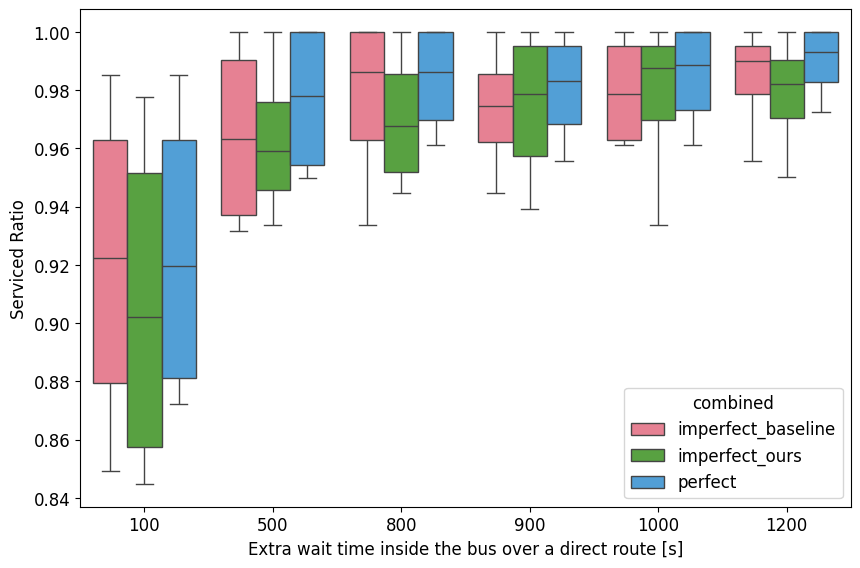

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'combined', 'Max wait time inside bus', and 'serviced ratio'

# Set the font size
plt.rcParams.update({'font.size': 12})

# Calculate figure size
a4_length_mm = 297
half_a4_length_mm = a4_length_mm / 2
half_a4_length_inches = half_a4_length_mm / 25.4  # Convert mm to inches
figure_width = half_a4_length_inches * 1.5  # Adjust width to maintain aspect ratio

# Create a boxplot with the new figure size
plt.figure(figsize=(figure_width, half_a4_length_inches))
sns.boxplot(x='Max wait time inside bus', y='serviced ratio', hue='combined', data=df, palette='husl')

# Set labels and title
plt.xlabel('Extra wait time inside the bus over a direct route [s]')
plt.ylabel('Serviced Ratio')
# plt.title('Serviced Ratio by Combined and Max Wait Time Inside Bus')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Save the plot with DPI 300
plt.savefig('/home/igorsadalski/Desktop/igor_master_theis/final_results/main_different_wait_buses.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()